# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atmosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de una manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como:

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
xy-\beta z\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parámetros y  realice un gráfico en 3D de la solución, empleando el código de más abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Cómo puede estar seguro de que la solución es la esperada?


In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#debemos resolver el primer sistema de ecuaciones lineales

#definimos las constante para la primera solución
sigma = 10
beta = 8/3
rho = 28
#el tiempo
t = np.linspace(0, 100, 10000)
#condiciones iniciales
x_0 = 1.5
y_0 = 1.5
z_0 = 1.5

condiciones_iniciales = np.array([x_0, y_0, z_0])

In [3]:
#definimos una función que contenga las tres funciones
def atractor(condiciones_iniciales, t, sigma, rho, beta):
  x, y, z = condiciones_iniciales
  dxdt = sigma*y - sigma*x
  dydt = rho*x - z*x - y
  dzdt = x*y - beta*z
  return dxdt, dydt, dzdt

In [4]:
#solucionamos el sistema para las primeras condiciones iniciales
solucion1 = odeint(atractor, condiciones_iniciales, t, args = (sigma, rho, beta))

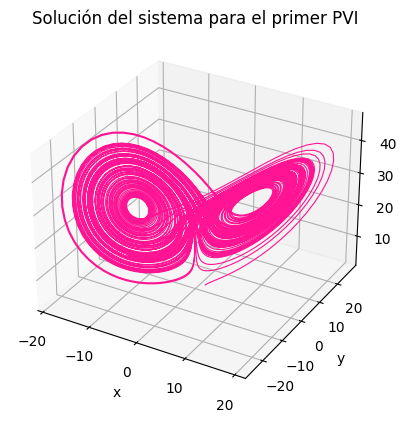

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(solucion1[:, 0], solucion1[:, 1], solucion1[:, 2], linewidth=0.8, color = "deeppink")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Solución del sistema para el primer PVI")
plt.draw()
plt.show()

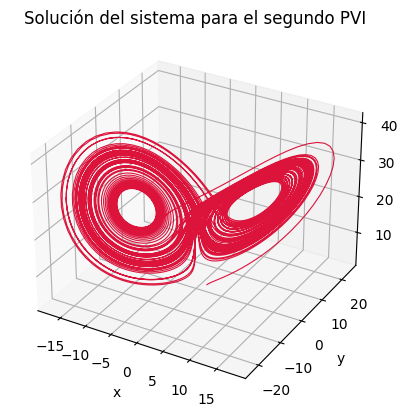

In [6]:
#condiciones para la segunda solucion
rho2 = 25
solucion2 = odeint(atractor, condiciones_iniciales, t, args = (sigma, rho2, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(solucion2[:, 0], solucion2[:, 1], solucion2[:, 2], linewidth=0.8, color = "crimson")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Solución del sistema para el segundo PVI")
plt.draw()
plt.show()

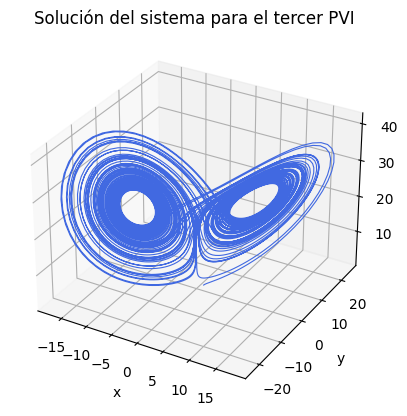

In [7]:
#condiciones para la tercera solucion
x_3 = 1
y_3 = 1
z_3 = 1
condiciones_iniciales3 = np.array([x_3, y_3, z_3])
solucion2 = odeint(atractor, condiciones_iniciales3, t, args = (sigma, rho2, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(solucion2[:, 0], solucion2[:, 1], solucion2[:, 2], linewidth=0.8, color = "royalblue")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Solución del sistema para el tercer PVI")
plt.draw()
plt.show()

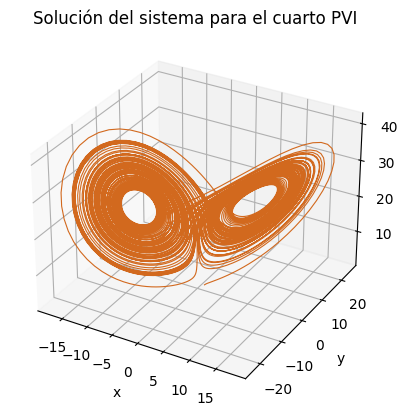

In [8]:
#condiciones para la cuarta solución
x_4 = 1.001
y_4 = 1.001
z_4 = 1.001
condiciones_iniciales4 = np.array([x_4, y_4, z_4])
solucion2 = odeint(atractor, condiciones_iniciales4, t, args = (sigma, rho2, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(solucion2[:, 0], solucion2[:, 1], solucion2[:, 2], linewidth = 0.8, color = "chocolate")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Solución del sistema para el cuarto PVI")
plt.draw()
plt.show()